# **AN ANALYSIS INTO THE MOVIE INDUSTRY**

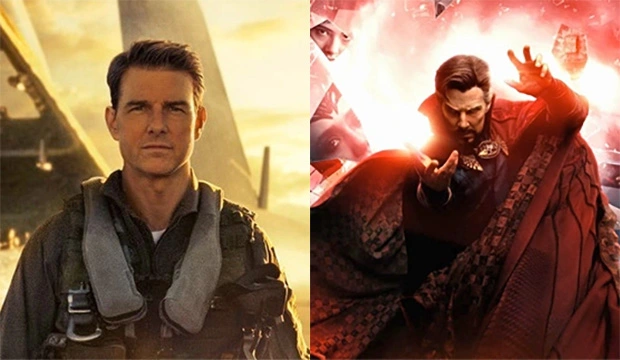

# **Project Overview**

This project aims to use exploratory data analysis to generate insights for a business stakeholder aiming to venture into a new line of business




# **Business Understanding**

Microsoft Corporation is an American multinational technology corporation which produces computer software, consumer electronics, personal computers, and related services. They are looking to diversify and venture into the movie scene by opening up a movie studio.Before making the big leap, they need to have a better understanding of the movie industry. To this end, I have been tasked with exploring what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what genre of films to produce.

# **Problem Statement**
The movie industry is without a doubt just as competitive and as dependent on internal and external factors as any other industry. A knowledge management system on the industry is therefore essential in order to navigate the industry successfully. The main challenge is the uncontrollability of the product, there is now way to predict how the audience will interact with it. This large financial gamble therefore necessitates an in-depth analysis on which genres of movies are preferred by majority of the audience and those that generate high returns on investments.

**import the neccessary modules/packages**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **DATA UNDERSTANDING**

To understand the data, first open each of the data sets to see what they contain. This will guide on what data sets to use for our EDA.The goal of any business is making profits so an ideal data set should have production budgets and revenue generated from the movies.

In [2]:
# This dataset doesn't have any information that will be useful for my analysis hence i won't use it
tmdb_df= pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# has gross revenues but no production budget therefore we cannot calculate profits 
#but it has a column containing studio names so we can compare this with the  foreign gross
bom_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_df.sort_values(by = 'foreign_gross', ascending = False)

,title,studio,domestic_gross,foreign_gross,year
1805,Life's a Breeze,Magn.,3500.0,99700,2014
1331,The East,FoxS,2300000.0,99700,2013
302,White Lion,Scre.,NaN,99600,2010
2906,A United Kingdom,FoxS,3900000.0,9900000,2017
510,Le Havre,Jan.,612000.0,9900000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The foreign_gross is an object and has to be converted to a float dtype. it also has missing values that we will have to drop since replacing them might gretly affect the accuracy of our analysis. The cell below selects the two columns that will be usedul for our  data visualization.

In [5]:
bom_df[['studio','foreign_gross']]

,studio,foreign_gross
0,BV,652000000
1,BV,691300000
2,WB,664300000
3,WB,535700000
4,P/DW,513900000
...,...,...
3382,Magn.,NaN
3383,FM,NaN
3384,Sony,NaN
3385,Synergetic,NaN


In [6]:
# check for duplicates
bom_df[['studio','foreign_gross']].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382     True
3383     True
3384     True
3385    False
3386     True
Length: 3387, dtype: bool

In [7]:
# drop duplicates
studios = bom_df[['studio','foreign_gross']].drop_duplicates().sort_values(by = 'foreign_gross', ascending = False)
studios

,studio,foreign_gross
1805,Magn.,99700
1331,FoxS,99700
302,Scre.,99600
3181,Sony,9900000
2906,FoxS,9900000
...,...,...
3329,MUBI,NaN
3356,Super,NaN
3375,CARUSEL,NaN
3378,PDF,NaN


In [8]:
# drop missing values
studios.dropna(inplace = True)
studios

,studio,foreign_gross
1805,Magn.,99700
1331,FoxS,99700
302,Scre.,99600
3181,Sony,9900000
2906,FoxS,9900000
...,...,...
3079,BV,"1,369.5"
1874,Uni.,"1,163.0"
1872,BV,"1,131.6"
1873,Uni.,"1,019.4"


In [9]:
# covert dtype from object to numeric
studios['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'],errors ='coerce' )
studios['foreign_gross'].dtypes

dtype('float64')

In [11]:
studios

,studio,foreign_gross
1805,Magn.,99700.0
1331,FoxS,99700.0
302,Scre.,99600.0
3181,Sony,9900000.0
2906,FoxS,9900000.0
...,...,...
3079,BV,NaN
1874,Uni.,NaN
1872,BV,NaN
1873,Uni.,NaN


In [66]:
# won't be used, no useful information for our problem statement
df_movieinfo = pd.read_csv('rt.movie_info.tsv.gz', delimiter ='\t')
df_movieinfo


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [65]:
df_movieinfo['split_column'] = df_movieinfo['genre'].str.split()
df_movieinfo.explode('split_column')

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,split_column
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,and
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Adventure|Classics|Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Drama|Science
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,House
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,and
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,International|Comedy|Drama|Mystery
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,and


In [13]:
# a good dataset as it has production budget and the gross revenues
# lets explore it further
budget_df = pd.read_csv('tn.movie_budgets.csv.gz')
budget_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Checking Overall Structure of the Data**
It has 5782 rows and 6 columns. No missing values as all entries for each column match to 5782. the data types are objects which means we will have to convert the numerical data to integers and the date to datetime

In [14]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
# check for duplicates
budget_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

I will check if there are any placeholders used in the movie column using the .unique() method

In [16]:
budget_df['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

The data doesn't seem to have any null values. The is however duplicated values in the movies column. The production budgets and gross revenues are however objects therefore we need to convert them to float for analysis. We further also need to remove the $ and , in the figures.
Then we will create a column for profits from the worldwide market


In [17]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Convert numerical data to integers

In [18]:
budget_df['worldwide_gross']= budget_df['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['production_budget'] = budget_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['domestic_gross']= budget_df['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


For readability of the table and cleaning up th worldwide_gross column, we can divide the figures by 1000000 and convert the to millions

In [19]:
budget_df['prod_budget_mil'] = (budget_df['production_budget'] / 1000000)
budget_df['dom_gross_mil']  = (budget_df['domestic_gross'] / 1000000)
budget_df['world_gross_mil'] = (budget_df['worldwide_gross'] / 1000000)
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0,620.181382,1316.721747


In [20]:
budget_df['release_date'] =pd.to_datetime(budget_df['release_date'] )

In [21]:
# confirm if the columns are floats and date format for release date
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   prod_budget_mil    5782 non-null   float64       
 7   dom_gross_mil      5782 non-null   float64       
 8   world_gross_mil    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 406.7+ KB


next we calculate the net revenue/profits for both domestic and worldwide markets

In [22]:
budget_df['dom_profits']= budget_df['dom_gross_mil']- budget_df['prod_budget_mil']
budget_df['world_profits'] = budget_df['world_gross_mil'] - budget_df['prod_budget_mil']
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,0.0060,0.048482,0.240495,0.042482,0.234495
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.0014,0.000000,0.000000,-0.001400,-0.001400


now that i have computed the columns i will need for my analysis, i will drop those that won't be needed in the next steps

In [23]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'prod_budget_mil', 'dom_gross_mil',
       'world_gross_mil', 'dom_profits', 'world_profits'],
      dtype='object')

In [24]:
budget_df = budget_df.drop(columns= ['production_budget','domestic_gross','worldwide_gross','id'])
budget_df

,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,2009-12-18,Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...
5777,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,1999-04-02,Following,0.0060,0.048482,0.240495,0.042482,0.234495
5779,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400


In [25]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   release_date     5782 non-null   datetime64[ns]
 1   movie            5782 non-null   object        
 2   prod_budget_mil  5782 non-null   float64       
 3   dom_gross_mil    5782 non-null   float64       
 4   world_gross_mil  5782 non-null   float64       
 5   dom_profits      5782 non-null   float64       
 6   world_profits    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 316.3+ KB


In [26]:
budget_df.describe()

,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,31.587757,41.873327,91.487461,10.285570,59.899704
std,41.812077,68.240597,174.719969,49.921366,146.088881
min,0.001100,0.000000,0.000000,-307.237650,-200.237650
25%,5.000000,1.429534,4.125415,-9.132757,-2.189071
50%,17.000000,17.225945,27.984448,-0.348776,8.550286
75%,40.000000,52.348662,97.645837,17.781444,60.968502
max,425.000000,936.662225,2776.345279,630.662225,2351.345279


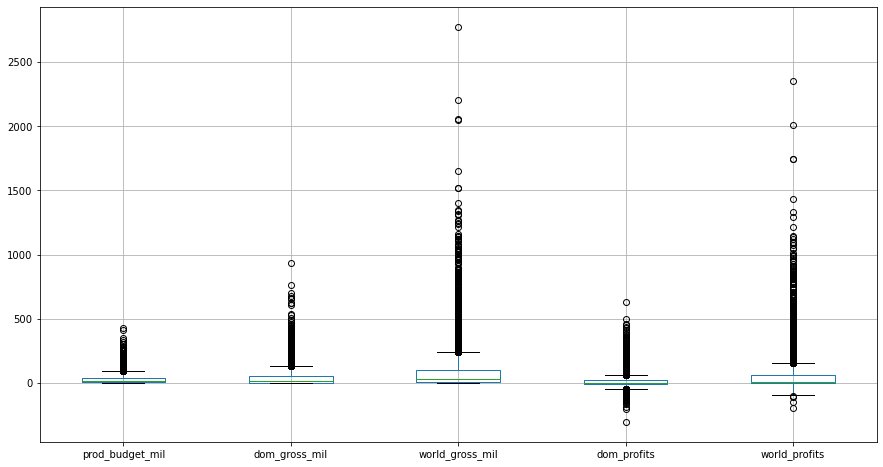

In [106]:
budget_df.boxplot(figsize =(15,8));

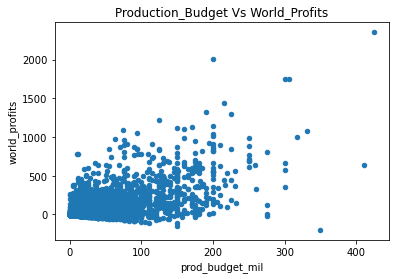

In [100]:
world_plot = budget_df.plot(kind ='scatter', x= 'prod_budget_mil', y= 'world_profits' )
world_plot.set_title("Production_Budget Vs World_Profits");

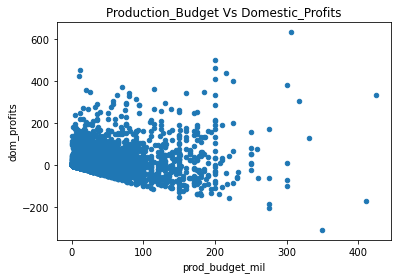

In [101]:
domestic_plot = budget_df.plot(kind ='scatter', x= 'prod_budget_mil', y='dom_profits')
domestic_plot.set_title("Production_Budget Vs Domestic_Profits");


To read from the data from imdb, we have to first create a connection to the database by invoking pd.read_sql()

In [29]:
conn = sqlite3.connect('zippedData/im.db')

In [30]:
#genres column is useful and will be selected when joining the tables
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We can check if any of the movies from the csv data is contained in the movie_basics table:

In [31]:
movie_basics[movie_basics['primary_title'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [32]:
movie_basics[movie_basics['primary_title'] == 'Avengers: Age of Ultron']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"


In [33]:
movie_basics[movie_basics['primary_title'] == 'Red 11']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
127755,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


It is evident that the movie_basics database is related to the budget_df dataframe and hence we will have to find a way to merge the two in order  to analyze our data

In [34]:
#primary_name column useful and will be selected when joining the tables
persons = pd.read_sql("SELECT * FROM persons;", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [35]:
#does not contain any useful information for the analysis
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [36]:
#does not contain any useful information for the analysis
writers = pd.read_sql("SELECT * FROM writers;", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [37]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [38]:
#does not contain any useful information for the analysis
movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [39]:
# will use the table to select movie crew associated with high grossing movies
known_for = pd.read_sql("SELECT * FROM known_for;", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [40]:
# will use table to select the job categories of the movie crew
principals= pd.read_sql("SELECT * FROM principals;", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


We are going to make use of SQL JOINS to create table relations.
We will join the **movie basics, movie rating, persons,writers, known for and directors tables**

In [41]:
imdb_crew = pd.read_sql(''' SELECT
                               person_id,
                               movie_id,
                               primary_name,
                               category
                    
                        FROM persons
                        JOIN principals
                        USING (person_id)
;''', conn)

imdb_crew

,person_id,movie_id,primary_name,category
0,nm0061671,tt2398241,Mary Ellen Bauder,producer
1,nm0061865,tt0433397,Joseph Bauer,composer
2,nm0061865,tt1681372,Joseph Bauer,composer
3,nm0061865,tt2281215,Joseph Bauer,composer
4,nm0061865,tt2387710,Joseph Bauer,composer
...,...,...,...,...
1027907,nm9990381,tt6527982,Susan Grobes,actress
1027908,nm9990690,tt8737130,Joo Yeon So,actress
1027909,nm9991320,tt8734436,Madeline Smith,actress
1027910,nm9991786,tt8739240,Michelle Modigliani,producer


In [42]:
ratings = pd.read_sql('''SELECT 
                        movie_id,
                        primary_title,
                        genres,
                       averagerating
                       FROM movie_basics
                        JOIN movie_ratings
                        USING(movie_id);''', conn)
ratings

,movie_id,primary_title,genres,averagerating
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,Drama,6.9
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7
73853,tt9914642,Albatross,Documentary,8.5
73854,tt9914942,La vida sense la Sara Amat,None,6.6


In [43]:
merged = pd.merge(ratings, imdb_crew) 
merged

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer
...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self


In [44]:
joined_df = merged.join(budget_df, how = 'outer')
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self,NaT,NaN,NaN,NaN,NaN,NaN,NaN


**Check for missing values in the joined dataset**

In [45]:
joined_df.isna()

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629594,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629595,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629596,False,False,False,False,False,False,False,True,True,True,True,True,True,True


In [46]:
joined_df.isna().sum()

movie_id                0
primary_title           0
genres               5140
averagerating           0
person_id               0
primary_name            0
category                0
release_date       623816
movie              623816
prod_budget_mil    623816
dom_gross_mil      623816
world_gross_mil    623816
dom_profits        623816
world_profits      623816
dtype: int64

Since there is a very very large occurrence of missing values, it will be advisable to drop all the missing value occurrencews (rows). Since there are missing values represented by 'NaT', we have to first convert them into NaN in order to drop them.

In [47]:
joined_df.replace('NaT', np.NaN)
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# drop the null values
joined_df.dropna(inplace =True)
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,tt10088006,Free Spirit,Drama,7.4,nm3807784,Emil Nava,director,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,tt10088006,Free Spirit,Drama,7.4,nm5153682,David James,writer,1999-04-02,Following,0.0060,0.048482,0.240495,0.042482,0.234495
5779,tt10088006,Free Spirit,Drama,7.4,nm5795819,Jahking Guillory,actor,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,tt10088006,Free Spirit,Drama,7.4,nm7534845,Amy James,producer,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400


In [61]:
#try to explode the genre column into separate rows
joined_df['split_col'] = joined_df['genres'].str.split()
joined_df.explode('split_col')

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279,"Action,Crime,Drama"
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875,"Action,Crime,Drama"
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650,"Action,Crime,Drama"
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963,"Action,Crime,Drama"
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747,"Action,Crime,Drama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,tt10088006,Free Spirit,Drama,7.4,nm3807784,Emil Nava,director,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000,Drama
5778,tt10088006,Free Spirit,Drama,7.4,nm5153682,David James,writer,1999-04-02,Following,0.0060,0.048482,0.240495,0.042482,0.234495,Drama
5779,tt10088006,Free Spirit,Drama,7.4,nm5795819,Jahking Guillory,actor,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662,Drama
5780,tt10088006,Free Spirit,Drama,7.4,nm7534845,Amy James,producer,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400,Drama


In [67]:
joined_df.isna().sum()

movie_id           0
primary_title      0
genres             0
averagerating      0
person_id          0
primary_name       0
category           0
release_date       0
movie              0
prod_budget_mil    0
dom_gross_mil      0
world_gross_mil    0
dom_profits        0
world_profits      0
split_col          0
dtype: int64

In [68]:
# descriptive data
joined_df.describe()

,averagerating,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
count,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000
mean,6.244942,31.027078,41.156845,89.331910,10.129767,58.304831
std,1.371297,41.227694,67.132259,171.345464,49.268044,143.261888
min,1.700000,0.001100,0.000000,0.000000,-307.237650,-200.237650
25%,5.500000,5.000000,1.385686,4.074626,-9.100000,-2.240753
50%,6.400000,17.000000,17.016190,27.682712,-0.347551,8.336997
75%,7.200000,40.000000,51.788372,96.082371,17.600572,59.628811
max,9.400000,425.000000,936.662225,2776.345279,630.662225,2351.345279


In [ ]:
# grouped_df = joined_df.groupby(['movie','genres','world_profits']).mean().sort_values(by = 'world_profits', ascending = False)
# grouped_df

In [ ]:
# joined_df = joined_df.drop(columns = ['person_id', 'dom_gross_mil', 'world_gross_mil']).sort_values(by= 'world_profits', ascending =False)
# joined_df

In [69]:
joined_df['genres'].value_counts().tail(40)

Sci-Fi,Thriller                  10
Adventure,Drama,Thriller         10
Adventure,Comedy,Sci-Fi          10
Action,Mystery,Sci-Fi            10
Drama,Horror,Mystery             10
Biography                        10
Drama,Music,Romance              10
Comedy,Drama,Fantasy             10
Adventure,Fantasy,Mystery        10
Action,Horror,Thriller           10
Action,Drama,Family              10
Action,Biography,Drama           10
Animation,Drama,History          10
Adventure,Crime,Drama            10
Horror,Mystery                    9
Comedy,Drama,War                  9
Comedy,Musical,Romance            9
Comedy,Music,Romance              9
Crime,Drama,Romance               9
Action,Drama,Sport                9
Adventure,Comedy                  9
Animation,Crime,Music             9
Biography,Documentary,Music       9
Comedy,Fantasy                    9
Horror,Mystery,Romance            9
Mystery,Romance                   8
Crime,Documentary                 8
Biography,Documentary,Histor

In [156]:
documentary_df =joined_df[joined_df['genres'] == 'Documentary']
documentary_df.sort_values(by = 'world_profits', ascending = False)

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
218,tt0285423,Abolição,Documentary,7.4,nm3005386,Agnaldo Timóteo,self,2002-05-03,Spider-Man,139.0,403.706375,821.706375,264.706375,682.706375,[Documentary]
81,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,nm0186908,Nancy Crawford,actress,2017-11-03,Thor: Ragnarok,180.0,315.058289,846.980024,135.058289,666.980024,[Documentary]
84,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,nm0137230,Len Cariou,actor,2016-11-18,Fantastic Beasts and Where to Find Them,180.0,234.037575,802.402853,54.037575,622.402853,[Documentary]
83,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,nm0417638,Byron Janis,composer,2014-05-30,Maleficent,180.0,241.407328,758.536735,61.407328,578.536735,[Documentary]
99,tt0170651,T.G.M. - osvoboditel,Documentary,7.5,nm0161615,Vera Chytilová,director,2016-08-05,Suicide Squad,175.0,325.100054,746.059887,150.100054,571.059887,[Documentary]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,nm0005000,Tony Hawk,self,2016-06-24,Free State of Jones,50.0,20.810036,23.237252,-29.189964,-26.762748,[Documentary]
1182,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,nm1436478,Kris Markovich,self,2005-02-25,Man of the House,50.0,19.699706,22.099706,-30.300294,-27.900294,[Documentary]
748,tt0430524,The Rescuer,Documentary,8.7,nm0342041,Leo Grillo,director,2010-05-28,Agora,70.0,0.619423,38.992292,-69.380577,-31.007708,[Documentary]
1187,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,nm2623028,Karina Hollekim,self,1994-07-01,Baby's Day Out,50.0,16.581575,16.581575,-33.418425,-33.418425,[Documentary]


In [75]:
# checking for duplicates in the movie column
dup_values = joined_df['movie'].duplicated().any()
print('Are there any duplicate values?', dup_values)

Are there any duplicate values? True


In [76]:
joined_df['movie'] = joined_df['movie'].drop_duplicates()
joined_df['movie'] 

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5743, dtype: object

In [158]:
# comedy genre
comedy_df =joined_df[joined_df['genres'] == 'Comedy']
comedy_df.sort_values(by = 'world_profits', ascending = False) 

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
1067,tt0452664,Party Crashers,Comedy,5.4,nm1492569,Rafael Dragaud,writer,2008-07-18,Mamma Mia!,52.0,144.130063,615.748772,92.130063,563.748772,[Comedy]
205,tt0285252,Life's a Beach,Comedy,3.9,nm0009272,Richard Gilbert Abramson,producer,2003-07-09,Pirates of the Caribbean: The Curse of the Bla...,140.0,305.411224,634.954103,165.411224,494.954103,[Comedy]
3340,tt0870208,Touch Wood,Comedy,8.7,nm2104208,Cyrcee Perreault,actress,1975-06-20,Jaws,12.0,260.000000,470.700000,248.000000,458.700000,[Comedy]
3341,tt0871891,The Nightclub Days,Comedy,5.0,nm1006275,John Biggins,cinematographer,1973-12-26,The Exorcist,12.0,230.347346,428.214478,218.347346,416.214478,[Comedy]
207,tt0285252,Life's a Beach,Comedy,3.9,nm0960950,Darren Geare,actor,1998-07-01,Armageddon,140.0,201.578182,554.600000,61.578182,414.600000,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,tt0476023,Stiffs,Comedy,7.3,nm1761345,Sandy Missakian,producer,2002-08-30,FearDotCom,40.0,13.208023,13.208023,-26.791977,-26.791977,[Comedy]
1513,tt0476023,Stiffs,Comedy,7.3,nm0851749,Giuliano Taviani,composer,2008-11-07,Soul Men,40.0,12.082391,12.345883,-27.917609,-27.654117,[Comedy]
1064,tt0452664,Party Crashers,Comedy,5.4,nm0905343,Andrucha Waddington,director,1998-10-16,Beloved,53.0,22.852487,22.852487,-30.147513,-30.147513,[Comedy]
766,tt0432010,The Queen of Sheba Meets the Atom Man,Comedy,7.1,nm0539652,Judith Malina,actress,2007-08-17,The Last Legion,67.0,5.932060,25.357771,-61.067940,-41.642229,[Comedy]


In [81]:
# Action,Crime,Drama
act_crime_drama = joined_df[joined_df['genres'] == 'Action,Crime,Drama'].sort_values(by ='world_profits', ascending = False)
act_crime_drama.head(10)

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279,"[Action,Crime,Drama]"
6,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0006210,Naushad,composer,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,378.815482,1748.134200,"[Action,Crime,Drama]"
5,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0756379,Balraj Sahni,actor,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,630.662225,1747.311220,"[Action,Crime,Drama]"
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963,"[Action,Crime,Drama]"
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747,"[Action,Crime,Drama]"
629,tt0411951,Tekken,"Action,Crime,Drama",4.8,nm0846480,Cary-Hiroyuki Tagawa,actor,2017-06-30,Despicable Me 3,75.0,264.624300,1034.727750,189.624300,959.727750,"[Action,Crime,Drama]"
437,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,nm1092086,David Harbour,actor,2017-12-20,Jumanji: Welcome to the Jungle,90.0,404.508916,964.496193,314.508916,874.496193,"[Action,Crime,Drama]"
7,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0474876,Sanjeev Kumar,actor,2007-05-24,Pirates of the Caribbean: At Worldâs End,300.0,309.420425,963.420425,9.420425,663.420425,"[Action,Crime,Drama]"
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875,"[Action,Crime,Drama]"
9,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1391276,Anjana Rawail,writer,2015-11-06,Spectre,300.0,200.074175,879.620923,-99.925825,579.620923,"[Action,Crime,Drama]"


In [82]:
act_crime_drama[act_crime_drama['movie'] == 'Avatar']

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279,"[Action,Crime,Drama]"


# **DATA VISUALIZATION**

The data visualization was mainly in form of bar plots. The different genres of movies were plotted against world profits

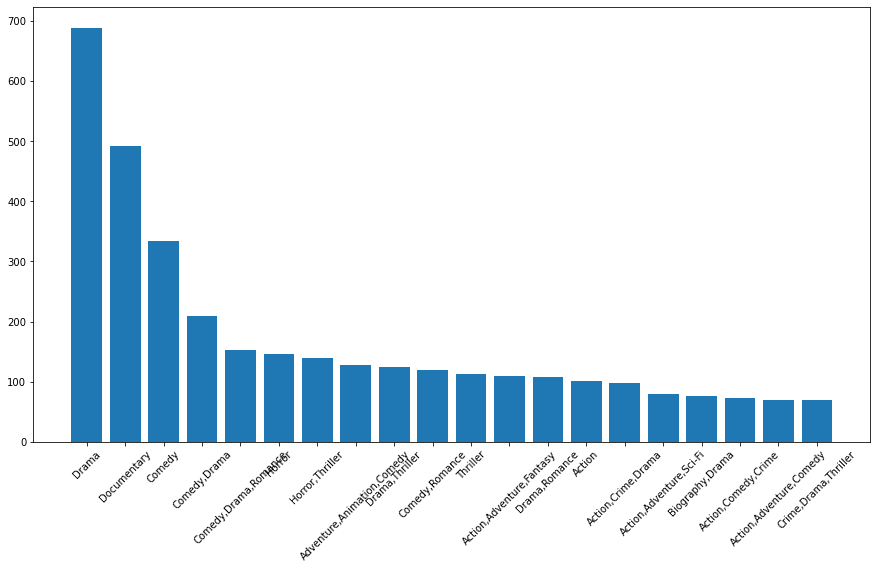

In [159]:
#plot the top 20 genres by value count
fig,ax =plt.subplots(figsize =(15,8))
plt.bar(list(joined_df['genres'].value_counts().head(20).keys()), list(joined_df['genres'].value_counts().head(20)))
plt.xticks(rotation=45);

plt.show();

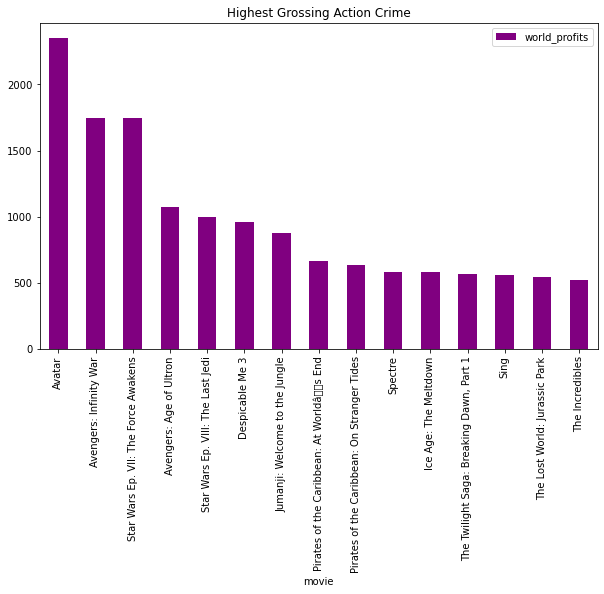

In [87]:
# plotting the genre 'Action,Crime, Drama' against world profits in millions
act_crime_drama.head(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), \
                              title = 'Highest Grossing Action Crime',color ='purple');

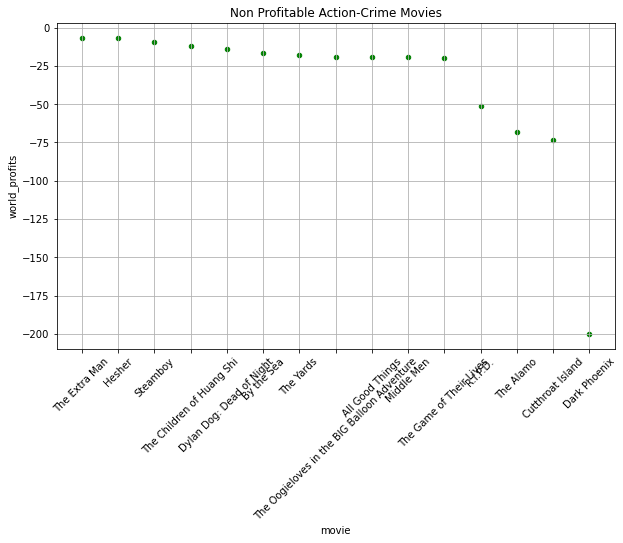

In [181]:
act_crime_drama.tail(15).plot('movie','world_profits',kind ='scatter',figsize =(10,6), \
                    title = 'Non Profitable Action-Crime Movies', color ='g', grid =True)
plt.xticks(rotation =45);

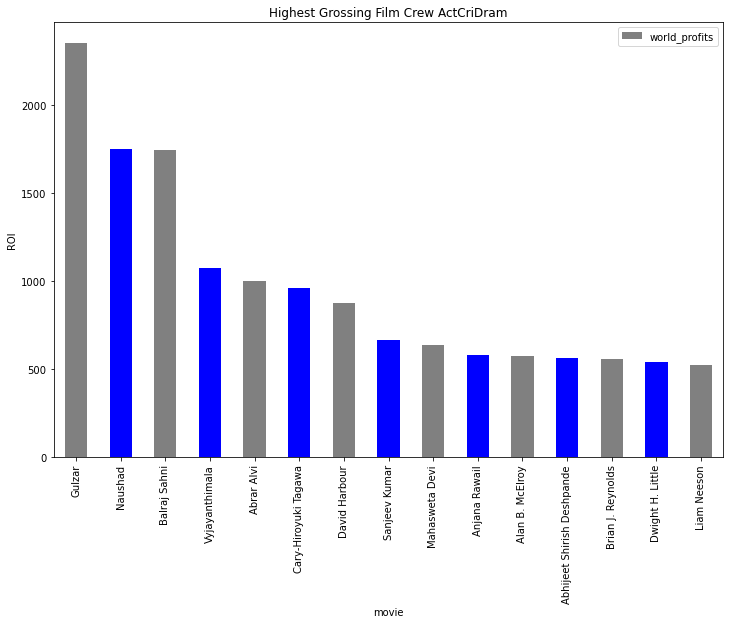

In [191]:
act_crime_drama.head(15).plot('primary_name','world_profits',kind ='bar',\
                              figsize =(12,8), ylabel ='ROI', xlabel= 'movie', \
                              title = 'Highest Grossing Film Crew ActCriDram',color =['gray','blue']);

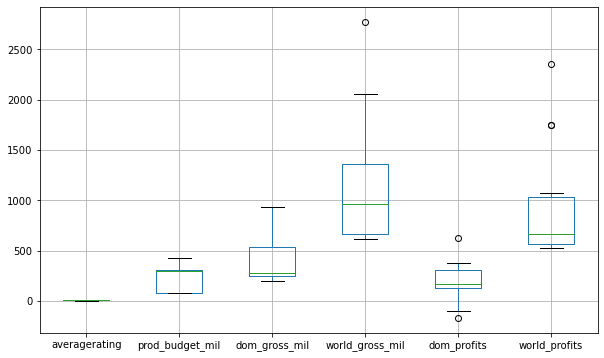

In [163]:
act_crime_drama.head(15).boxplot(figsize = (10,6));

From the boxplot for the Action, Crime,Drama genre, half the world profits are greater than the median value for world profits

In [164]:
# Checking for top names associated with the genre Action,Crime,Drama
list(act_crime_drama['primary_name'].head(15))

['Gulzar',
 'Naushad',
 'Balraj Sahni',
 'Vyjayanthimala',
 'Abrar Alvi',
 'Cary-Hiroyuki Tagawa',
 'David Harbour',
 'Sanjeev Kumar',
 'Mahasweta Devi',
 'Anjana Rawail',
 'Alan B. McElroy',
 'Abhijeet Shirish Deshpande',
 'Brian J. Reynolds',
 'Dwight H. Little',
 'Liam Neeson']

In [165]:
# descriptive statistics
act_crime_drama.describe()

,averagerating,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,5.930612,81.093878,109.952208,299.542403,28.858331,218.448525
std,0.901363,96.102982,166.395287,474.425763,113.938948,400.679913
min,4.500000,2.500000,0.004091,0.174255,-307.237650,-200.237650
25%,5.200000,14.000000,1.201985,10.918469,-17.655598,-0.731076
50%,6.100000,75.000000,49.777001,152.756489,-0.852432,68.045147
75%,6.600000,91.750000,140.442149,355.318813,18.193949,260.158591
max,7.100000,425.000000,936.662225,2776.345279,630.662225,2351.345279


In [166]:
drama = joined_df[joined_df['genres'] == 'Drama'].sort_values(by ='world_profits', ascending = False)
drama

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits,split_col
66,tt0146592,Pál Adrienn,Drama,6.8,nm1825349,Ferenc Pusztai,producer,2015-04-03,Furious 7,190.0,353.007020,1518.722794,163.007020,1328.722794,[Drama]
26,tt0069049,The Other Side of the Wind,Drama,6.9,nm0000080,Orson Welles,director,2012-05-04,The Avengers,225.0,623.279547,1517.935897,398.279547,1292.935897,[Drama]
112,tt0192528,Heaven & Hell,Drama,4.0,nm0378560,Jacques Hébert,production_designer,2018-06-22,Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,247.719760,1135.772799,[Drama]
22,tt0069049,The Other Side of the Wind,Drama,6.9,nm0000953,Peter Bogdanovich,actor,2017-04-14,The Fate of the Furious,250.0,225.764765,1234.846267,-24.235235,984.846267,[Drama]
95,tt0162942,Children of the Green Dragon,Drama,6.9,nm1342004,Eszter Bánfalvi,actress,2019-03-08,Captain Marvel,175.0,426.525952,1123.061550,251.525952,948.061550,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,tt0460809,The Grasslands,Drama,8.6,nm4612864,Christopher J. Kito,producer,2019-09-20,Ad Astra,49.8,0.000000,0.000000,-49.800000,-49.800000,[Drama]
1207,tt0460809,The Grasslands,Drama,8.6,nm1752973,Ron Wolf,cinematographer,2019-11-22,The Rhythm Section,50.0,0.000000,0.000000,-50.000000,-50.000000,[Drama]
1205,tt0460809,The Grasslands,Drama,8.6,nm0338886,Peter Greene,actor,2020-12-31,Hannibal the Conqueror,50.0,0.000000,0.000000,-50.000000,-50.000000,[Drama]
1206,tt0460809,The Grasslands,Drama,8.6,nm4115592,Vincent Framularo,producer,2019-11-08,Arctic Dogs,50.0,0.000000,0.000000,-50.000000,-50.000000,[Drama]


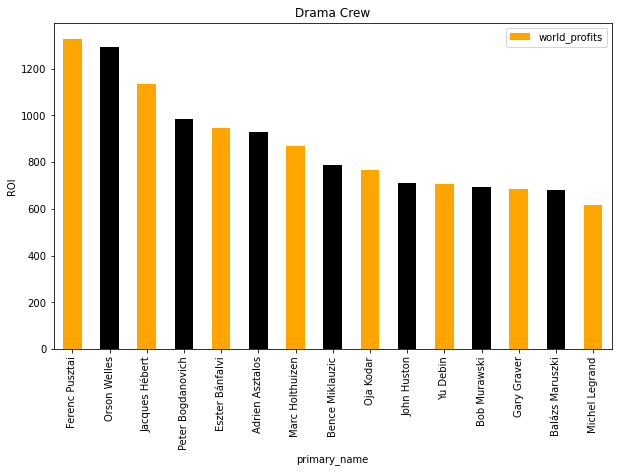

In [188]:
drama.head(15).plot('primary_name','world_profits',kind ='bar',figsize =(10,6), ylabel = 'ROI',title = 'Drama Crew', color =['orange','black']);

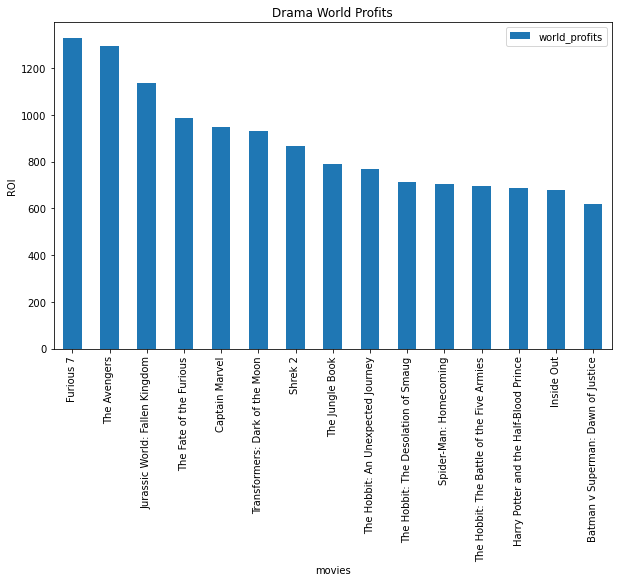

In [192]:
drama.head(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), ylabel = 'ROI', \
                    xlabel = 'movies', title = 'Drama World Profits');

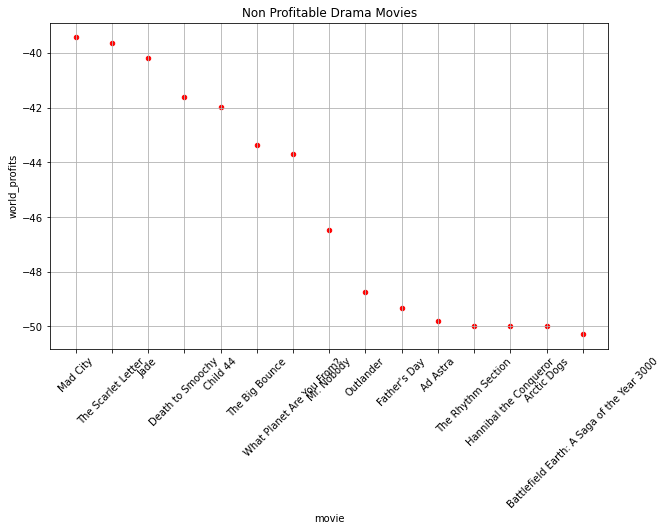

In [179]:
drama.tail(15).plot('movie','world_profits',kind ='scatter',figsize =(10,6), \
                    title = 'Non Profitable Drama Movies', color ='red', grid =True)
plt.xticks(rotation =45);

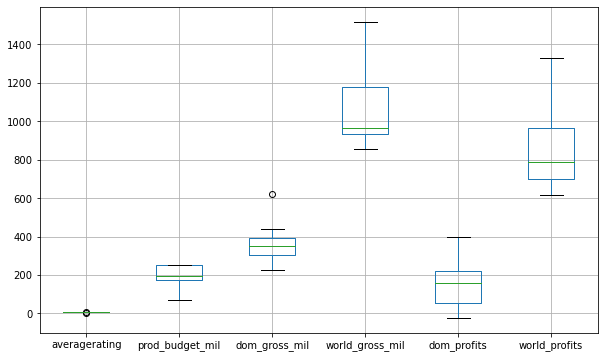

In [175]:
drama.head(15).boxplot(figsize = (10,6));

From the boxplot for the drama genre, half the world profits are greater than the median value.

In [ ]:
# grouped_df1 = joined_df.groupby(['genres','primary_name', 'category']).mean().sort_values(by = 'world_profits', ascending = False)
# grouped_df1

# **FINDINGS**
Movies under the genre 'Action, Crime, Drama' had the highest ROI in terms on net world earnings with a maximum of 2351 million and a minimum of 98 million. The production bugdet had a maximum value of 425 million and a minimum of 2.5 million. We can infer from the figures that its a heavy investment but the returns are indeed rewarding. As seen from the boxplot, half of the profits from this genre above the median value. Comparing the production cost and the net world profits, the ROI in this category is five times over the production cost. The highest profitable movies are: **Avatar, Avengers: Infinity Wars Star, Wars Ep. VII: The Force Awakens, Avengers: Age of Ultron** The crew behind these movies are **Gulzar(writer), Naushad(composer), Balraj Sahni(actor), David Harbour(actor),Cary-Hiroyuki Tagawa(actor)
Abrar Alvi(writer), Liam Neeson(actor)**

The second most profitable genre was the drama category with a maximum of 1328 million almost half that of 'Action, Crime, Drama'.

The third profitable genre was "Comedy,Drama, Romance' with a maximum ROI of 1047 millions. It is not an expected results since the average rating for these movies is a 7.9.
Genres such as Family and Animation returned negative ROIs but this could be due to the fact that the sample size for these genres was very small compared to the rest.



# **AREAS OF FURTHER STUDY**
This analysis was mainly based on measuring sucessful movies based on ROI but in reality there are many other compounding factors that affect the movie industry and these should be explored before Microsoftmakes the big leap. These factors include but are not limited to: actors role, the uncontrollability of the industry, influence of social trends on movie vierwship, marketing especially online trailers, effects of piracy on the movie industry and  critiques reception.

# **RECOMMENDATIONS**



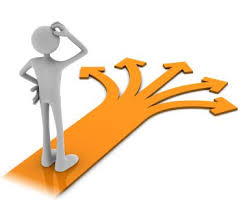

Filmmaking is both a commercial and artistic venture. With the revolution in visual F/X in the movie industry, it is expected that Action, Crime movies would be the onens with the highest ROI since they heavily make use of this technique.
Microsofts is among the industry leaders in the tech industry from advanced cloud and AI tools to build their own digital solutions, it will be a wise move to produce Action, Crime, Drama movies with a production buget of around 250 million. Data has shown higher production costs more than triples the worlwide ROI. I would therefore recommend heavy financial aspect in areas such as special visual effects such as Pyrotechnics, prosthetic makeup, animatronics, and live-action weather elements. Movies such as THE Avatar, Avengers performed well because of their special effects.since these are usually technology intensive and Microsoft has the capacity.

Microsoft should also consider opening a production studio as we recognize the role the major Hollywood studios have in shaping the movie industry today. The studios generate marketing and publicity.

The film-making process is a machine with many running parts. If you want to successfully make a film, you will need a great film production team and therefore Microsoft should consider working with the top writers, directors, composers and actors in this genre.
